# JAX Learning Notes
--------------------
# Tutorial JAX 101

## JAX As Accelerated Numpy

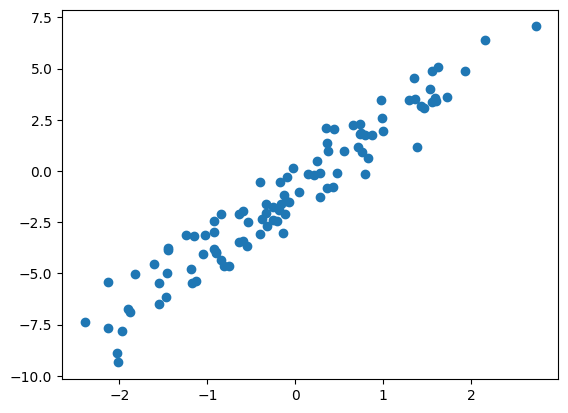

In [1]:
# Linear Regression Example

import jax
from jax import numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

xs = np.random.normal(size=(100,))
noise = np.random.normal(scale=1, size=(100,))
ys = xs * 3 - 1 + noise

plt.scatter(xs, ys)


In [3]:
def model(theta, x):
    """Computes wx + b on a batch of input x."""
    w, b = theta
    return w * x + b
def loss_fn(theta, x, y):
    prediction = model(theta, x)
    return jnp.mean((prediction-y)**2)
@jax.jit
def update(theta, x, y, lr=0.1):
    return theta - lr * jax.grad(loss_fn)(theta, x, y)

loss: 10.60
loss: 0.89
loss: 0.89
loss: 0.89
loss: 0.89
loss: 0.89
loss: 0.89
loss: 0.89
loss: 0.89
loss: 0.89
w: 3.04, b: -0.88


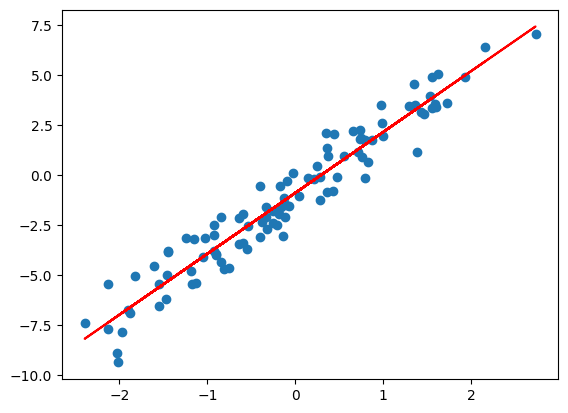

In [7]:
theta = jnp.array([1., 1.])
init_lr = 1
for i in range(1000):
    if i % 100 == 0:
        print(f"loss: {loss_fn(theta, xs, ys):<.2f}")
    theta = update(theta, xs, ys,init_lr/(1+i))

plt.scatter(xs, ys)
plt.plot(xs, model(theta, xs), color='red')

w, b = theta
print(f"w: {w:<.2f}, b: {b:<.2f}")